## I. User

**Dự đoán**
- Trước khi tìm hiểu dữ liệu, ta xác định một số mong đợi về tập dữ liệu Soundcloud về user
  + Yếu tố nào quyết định một người dùng được quan tâm (độ được quan tâm đánh giá bằng số followers): liệu có mối quan hệ giữa track, playlist với follower, có thể người đăng càng nhiều track và playlist thì sẽ thu được càng nhiều follower
  + Với các người dùng được nhiều follower, liệu sẽ nhận được lượng likes nhiều hơn? 
  + Người dùng đăng kí gói nhạc trả phí liệu có đặc điểm chung giữa họ hay không?
  + Các đất nước có số lượng user sử dụng soundclound nhiều?		

##### Import thư viện

In [67]:
import pandas as pd
import numpy as np
import requests as r
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

**1. Kiểm tra tống quan về dữ liệu**

In [5]:
users = pd.read_csv("user.csv", sep='\t')
users.drop(columns="index", inplace=True)
users.shape

(1500, 38)

In [10]:
users.head()

,avatar_url,city,comments_count,country_code,created_at,creator_subscriptions,description,followers_count,followings_count,first_name,...,station_permalink,creator_subscription.product.id,visuals.urn,visuals.enabled,visuals.visuals,visuals.tracking,badges.pro,badges.pro_unlimited,badges.verified,visuals
0,https://i1.sndcdn.com/avatars-LQHwEEFP8SciWWEl...,Berlin,384,DE,2007-07-20T16:07:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],Founder & CEO Dance. Founder SoundCloud and ar...,45706,2000,Eric,...,artist-stations:2,creator-pro-unlimited,soundcloud:users:2,True,"[{'urn': 'soundcloud:visuals:105136722', 'entr...",NaN,False,True,False,NaN
1,https://i1.sndcdn.com/avatars-000019102368-0eu...,Stockholm,31,DE,2007-07-20T17:54:00Z,[{'product': {'id': 'free'}}],"Opps, I can change Johans description. /emil",8325,139,Emil,...,artist-stations:6,free,NaN,NaN,NaN,NaN,False,False,False,NaN
2,https://i1.sndcdn.com/avatars-000208970259-vng...,Berlin/NYC,697,DE,2007-07-25T23:08:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],"Hi, my name is Alex. I like Sound. Founder & C...",180212,1715,Alexander,...,artist-stations:8,creator-pro-unlimited,soundcloud:users:8,True,"[{'urn': 'soundcloud:visuals:3142', 'entry_tim...",NaN,False,True,False,NaN
3,https://a1.sndcdn.com/images/default_avatar_la...,Stockholm,5,SE,2007-07-27T14:15:18Z,[{'product': {'id': 'free'}}],NaN,1246,51,Filip,...,artist-stations:10,free,NaN,NaN,NaN,NaN,False,False,False,NaN
4,https://i1.sndcdn.com/avatars-YU1Y4hVJyNPwYfRI...,NaN,506,NaN,2007-07-27T14:18:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],Tell us about Youssef!,23033,459,Hannes,...,artist-stations:12,creator-pro-unlimited,NaN,NaN,NaN,NaN,False,True,False,NaN


- **Tóm tắt**

|Thuộc tính|Kiểu dữ liệu|     Ý nghĩa  
|:--------:|:-------------:|:-----------:
|**avatar_url**|Chuỗi |Đường dẫn đến ản đại diện của user|
|**created_at**|Thời gian|Thời gian khởi tạo user|   
|**description**|Chuỗi|Mô tả user của người đăng tải| 
|**city**|Chuỗi|Thành phố user đang sống|
|**country_code**|Chuỗi|Mã quốc gia user đang sống|
|**id**|Kiểu phân loại|Định danh của user|
|**comments_count**|Số nguyên|Số lượt bình luận của user|
|**likes_count**|Số nguyên|Số lượt được yêu thích của user|
|**followers_count**|Số nguyên|Số lượt theo dõi của user|
|**followings_count**|Số nguyên|Số lượt user theo dõi|
|**playlist_likes_count**|Số nguyên|Số lượt được yêu thích các playlist của user|
|**playlist_count**|Số nguyên|Số playlist của user|
|**reposts_count**|Số nguyên|Số bài đăng lại của user|
|**track_count**|Số nguyên|Số lượng track của user|
|**kind**|Chuỗi|Loại đối tượng|
|**last_modified**|Thời gian|Lần chỉnh sửa cuối cùng| 
|**first_name**|Chuỗi|Tên của user|   
|**last_name**|Chuỗi|Họ của user|  
|**full_name**|Chuỗi|Tên đầy đủ của user| 
|**username**|Chuỗi|Tên đăng nhập của user|   
|**groups_count**|Số nguyên|Số nhóm của user|
|**permalink**|Chuỗi|Đường dẫn cố định của tài nguyên| 
|**permalink_url**|Chuỗi|Đường dẫn đến trang Soundcloud |   
|**uri**|Chuỗi|Đường dẫn API của user|    
|**url**|Chuỗi|Đường dẫn API của user|    
|**urn**|Chuỗi|Đường dẫn API của user|    
|**creator_subscriptions**|Chuỗi|Loại thành viên của user|    
|**creator_subscription.product.id**|Chuỗi|Loại thành viên của user|    
|**badges.pro_unlimited'**|Luận lý|User có phải người dùng pro_unlimited không|
|**verified**|Luận lý|Xác thực người dùng|
|**visuals**|Số thực||
|**visuals.urn**|Chuỗi
|**visuals.enabled**|Chuỗi|
|**visuals.visuals**|Chuỗi|
|**visuals.tracking**|Số thực|

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   avatar_url                       1500 non-null   object 
 1   city                             978 non-null    object 
 2   comments_count                   1500 non-null   int64  
 3   country_code                     1006 non-null   object 
 4   created_at                       1500 non-null   object 
 5   creator_subscriptions            1500 non-null   object 
 6   description                      647 non-null    object 
 7   followers_count                  1500 non-null   int64  
 8   followings_count                 1500 non-null   int64  
 9   first_name                       1179 non-null   object 
 10  full_name                        1180 non-null   object 
 11  groups_count                     1500 non-null   int64  
 12  id                  

- Dựa quá trình phân tích dữ liệu thì ta thấy được 3 thuộc tính ```visuals```, ```visuals.tracking``` và  ```visuals.tracking``` có phần trăm thiếu dữ liệu là 100%, ta tiến hành xóa 3 thuộc tính đó

In [12]:
users.drop(columns=["visuals", "visuals.tracking", "reposts_count"], inplace=True)

In [13]:
users["badges.pro_unlimited"].value_counts()

False    1307
True      193
Name: badges.pro_unlimited, dtype: int64

**a. Phân tích các thuộc tính định danh mỗi người dùng**

- Dựa và các bảng sau khi phân tích ý nghĩa của từng loại thuộc tính, ta thấy rằng các thuộc tính ```avatar_url```, ```first_name ```, ```full_name```, ```id```, ```uri```, ```urn```, ```permalink_url```, ```permalink``` và ```username``` đều dùng để định danh cho người dùng

In [14]:
print(f"Số lượng id: {users['id'].nunique()}")
print(f"Số lượng permalink_url: {users['permalink_url'].nunique()}")
print(f"Số lượng avatar_url: {users['avatar_url'].nunique()}")
print(f"Số lượng first_name: {users['first_name'].nunique()}")
print(f"Số lượng last_name: {users['last_name'].nunique()}")
print(f"Số lượng full_name: {users['full_name'].nunique()}")
print(f"Số lượng username: {users['username'].nunique()}")
      
print(f"Số lượng permalink_url: {users['permalink_url'].nunique()}")
print(f"Số lượng permalink: {users['permalink'].nunique()}")
      
print(f"Số lượng uri: {users['uri'].nunique()}")         
print(f"Số lượng urn: {users['urn'].nunique()}")     

Số lượng id: 1500
Số lượng permalink_url: 1500
Số lượng avatar_url: 1200
Số lượng first_name: 852
Số lượng last_name: 999
Số lượng full_name: 1179
Số lượng username: 1500
Số lượng permalink_url: 1500
Số lượng permalink: 1500
Số lượng uri: 1500
Số lượng urn: 1500


- Sau khi đếm số lượng ta thấy lương dữ liệu đa số là 100%, còn 1 vài phần dữ liệu bị thiếu ở các thuộc tính như ```avatar_url```, ```first_name```, ```last_name```, ```full_name```, 

**b. Phân tích các thuộc tính trùng lắp**

- Dựa vào bảng phân tích ý nghĩa của thuộc tính, ta tiến hành xét 2 thuộc tính ```created_at``` và ```last_modified``` có bị trùng nhau hay không tại vì có thể người dùng có thể vào tạo tài khoản và xem 

In [15]:
users[["created_at", "last_modified" ]]

,created_at,last_modified
0,2007-07-20T16:07:00Z,2020-07-21T08:17:59Z
1,2007-07-20T17:54:00Z,2020-01-06T18:00:02Z
2,2007-07-25T23:08:00Z,2020-10-20T14:38:52Z
3,2007-07-27T14:15:18Z,2017-07-10T18:35:14Z
4,2007-07-27T14:18:00Z,2020-04-28T18:50:42Z
...,...,...
1495,2008-06-15T18:13:29Z,2020-11-09T01:34:50Z
1496,2008-06-15T18:17:49Z,2017-10-08T10:21:15Z
1497,2008-06-15T18:21:32Z,2018-05-07T11:58:09Z
1498,2008-06-15T18:35:13Z,2017-04-24T16:12:24Z


In [16]:
temp = np.where(users["created_at"] == users["last_modified"])
print("Số lương bị thông tin bị trùng lắp dữ liệu giữa 2 thuộc tính: ", len(temp))

Số lương bị thông tin bị trùng lắp dữ liệu giữa 2 thuộc tính:  1


- Tiếp tục phân tích 3 thuộc tính ```creator_subscription.product.id```, ```badges.pro_unlimited ``` và ```creator_subscriptions ```

In [17]:
users[["creator_subscriptions", "badges.pro_unlimited", "creator_subscription.product.id"]]

,creator_subscriptions,badges.pro_unlimited,creator_subscription.product.id
0,[{'product': {'id': 'creator-pro-unlimited'}}],True,creator-pro-unlimited
1,[{'product': {'id': 'free'}}],False,free
2,[{'product': {'id': 'creator-pro-unlimited'}}],True,creator-pro-unlimited
3,[{'product': {'id': 'free'}}],False,free
4,[{'product': {'id': 'creator-pro-unlimited'}}],True,creator-pro-unlimited
...,...,...,...
1495,[{'product': {'id': 'creator-pro-unlimited'}}],True,creator-pro-unlimited
1496,[{'product': {'id': 'free'}}],False,free
1497,[{'product': {'id': 'free'}}],False,free
1498,[{'product': {'id': 'free'}}],False,free


=> 3 thuộc tính đều biểu diễn chung 1 ý nghĩa

- Phân tích 2 thuộc tính ```station_urn``` và ```station_permalink ```

In [18]:
users[["station_urn", "station_permalink"]]

,station_urn,station_permalink
0,soundcloud:system-playlists:artist-stations:2,artist-stations:2
1,soundcloud:system-playlists:artist-stations:6,artist-stations:6
2,soundcloud:system-playlists:artist-stations:8,artist-stations:8
3,soundcloud:system-playlists:artist-stations:10,artist-stations:10
4,soundcloud:system-playlists:artist-stations:12,artist-stations:12
...,...,...
1495,soundcloud:system-playlists:artist-stations:3262,artist-stations:3262
1496,soundcloud:system-playlists:artist-stations:3264,artist-stations:3264
1497,soundcloud:system-playlists:artist-stations:3266,artist-stations:3266
1498,soundcloud:system-playlists:artist-stations:3268,artist-stations:3268


=> 2 thuộc tích đều biểu diễn chung ý nghĩa

**c. Phân tích các thuộc tính không đóng góp gì vào dữ liệu**

In [19]:
for col in users:
    if (users[col].nunique() == 1):
        print(f'Số lương {col}: {users[col].nunique()}')

Số lương groups_count: 1
Số lương kind: 1
Số lương visuals.enabled: 1


### Phân tích tổng quát và chọn thuộc tính cần thiết

##### Phân tích
- Các thuộc tính định danh cho người dùng: ```avatar_url```, ```first_name ```, ```full_name```, ```id```, ```uri```, ```urn```, ```permalink_url```, ```permalink``` và ```username``` => Ta chọn thuộc tính ID để đại diện cho các thuộc tính còn lại
- Các cặp bị trùng lắp ý nghĩa
  + Cặp thuộc tính: ```creator_subscriptions```, ```badges.pro_unlimited``` và ```creator_subscription.product.id``` 
    => Ta sẽ chọn thuộc tính ```creator_subscription.product.id``` làm đại diện cho 2 thuộc tính còn lại
  + Cặp thuộc tính: ```station_urn``` và  ```station_permalink``` => ta sẽ chọn thuộc tính ```station_permalink``` làm đại diện
- Thuộc tính không đóng góp vào dữ liệu: ```groups_count```, ```kind``` và ```visuals.enabled```
- thuộc tính không hiểu mục đích của thuộc tính đó: ```visuals```, ```visuals.urn```, ```visuals.enabled```, ```visuals.visuals``` , 
```visuals.tracking```, ``````

##### Lựa chọn các thuộc tính cần thiết 
- ```id```
- ```city```
- ```country_code```
- ```comments_count```
- ```created_at```
- ```last_modified```
- ```description```
- ```likes_count```
- ```followings_count```
- ```followers_count```
- ```playlist_likes_count```
- ```playlist_count```
- ```track_count```
- ```verified```
- ```station_permalink```
- ```badges.pro_unlimited```
- ```badges.pro```
- ```badges.verified```

In [20]:
new_users = users[['id', 'city', 'country_code', 'comments_count', 'created_at', 'last_modified', 'description', 'likes_count',
                   'followings_count', 'followers_count', 'playlist_likes_count', 'playlist_count', 'track_count', 'verified',
                    'station_permalink', 'badges.pro_unlimited', 'badges.pro', 'badges.verified']]

**2. Tiền xử lí dữ liệu**

In [21]:
new_users.head()

,id,city,country_code,comments_count,created_at,last_modified,description,likes_count,followings_count,followers_count,playlist_likes_count,playlist_count,track_count,verified,station_permalink,badges.pro_unlimited,badges.pro,badges.verified
0,2,Berlin,DE,384,2007-07-20T16:07:00Z,2020-07-21T08:17:59Z,Founder & CEO Dance. Founder SoundCloud and ar...,2654,2000,45706,397,24,64,False,artist-stations:2,True,False,False
1,6,Stockholm,DE,31,2007-07-20T17:54:00Z,2020-01-06T18:00:02Z,"Opps, I can change Johans description. /emil",153,139,8325,6,0,2,False,artist-stations:6,False,False,False
2,8,Berlin/NYC,DE,697,2007-07-25T23:08:00Z,2020-10-20T14:38:52Z,"Hi, my name is Alex. I like Sound. Founder & C...",1680,1715,180212,351,34,268,False,artist-stations:8,True,False,False
3,10,Stockholm,SE,5,2007-07-27T14:15:18Z,2017-07-10T18:35:14Z,NaN,43,51,1246,4,0,3,False,artist-stations:10,False,False,False
4,12,NaN,NaN,506,2007-07-27T14:18:00Z,2020-04-28T18:50:42Z,Tell us about Youssef!,249,459,23033,105,11,82,False,artist-stations:12,True,False,False


In [22]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1500 non-null   int64 
 1   city                  978 non-null    object
 2   country_code          1006 non-null   object
 3   comments_count        1500 non-null   int64 
 4   created_at            1500 non-null   object
 5   last_modified         1500 non-null   object
 6   description           647 non-null    object
 7   likes_count           1500 non-null   int64 
 8   followings_count      1500 non-null   int64 
 9   followers_count       1500 non-null   int64 
 10  playlist_likes_count  1500 non-null   int64 
 11  playlist_count        1500 non-null   int64 
 12  track_count           1500 non-null   int64 
 13  verified              1500 non-null   bool  
 14  station_permalink     1500 non-null   object
 15  badges.pro_unlimited  1500 non-null   

- Dựa vào thông tin ở trên ta thấy đa số thuộc tính đều đủ dữ liệu, có 2 thuộc tính ```city``` , ```country_code``` và ```description``` là bị thiếu dữ liệu

**a. Xử lí vấn đề bị thiếu thông tin**

**. Thuộc tính Country_code**

- Ở thuộc tính ```country_code``` thiếu dữ liệu chiếm 30%, để giải quyết vấn đề thiếu dữ liệu ta sẽ dựa vào việc sử dụng thuộc tính ```city``` để suy luận ra thuộc tính ```country_code``` 

In [23]:
for i in range(0, new_users.shape[0]):
    try:
        if (np.isnan(new_users["country_code"][i])):
            print(new_users.loc[i, ["city", "country_code"]])
            print()
    except:
        None
            

city            NaN
country_code    NaN
Name: 4, dtype: object

city            NaN
country_code    NaN
Name: 13, dtype: object

city            NaN
country_code    NaN
Name: 15, dtype: object

city            NaN
country_code    NaN
Name: 16, dtype: object

city            NaN
country_code    NaN
Name: 18, dtype: object

city            NaN
country_code    NaN
Name: 23, dtype: object

city            Berlin
country_code       NaN
Name: 35, dtype: object

city            NaN
country_code    NaN
Name: 43, dtype: object

city            NaN
country_code    NaN
Name: 46, dtype: object

city            NaN
country_code    NaN
Name: 47, dtype: object

city            NaN
country_code    NaN
Name: 48, dtype: object

city            NaN
country_code    NaN
Name: 56, dtype: object

city            NaN
country_code    NaN
Name: 58, dtype: object

city            NaN
country_code    NaN
Name: 61, dtype: object

city            NaN
country_code    NaN
Name: 67, dtype: object

city            Stoc

Name: 816, dtype: object

city            NaN
country_code    NaN
Name: 818, dtype: object

city            NaN
country_code    NaN
Name: 819, dtype: object

city            NaN
country_code    NaN
Name: 820, dtype: object

city            NaN
country_code    NaN
Name: 821, dtype: object

city            NaN
country_code    NaN
Name: 822, dtype: object

city            NaN
country_code    NaN
Name: 825, dtype: object

city            NaN
country_code    NaN
Name: 831, dtype: object

city            NaN
country_code    NaN
Name: 833, dtype: object

city            NaN
country_code    NaN
Name: 834, dtype: object

city            NaN
country_code    NaN
Name: 836, dtype: object

city            NaN
country_code    NaN
Name: 838, dtype: object

city            NaN
country_code    NaN
Name: 844, dtype: object

city            NaN
country_code    NaN
Name: 847, dtype: object

city            NaN
country_code    NaN
Name: 851, dtype: object

city            NaN
country_code    NaN
Name: 854,

Name: 1406, dtype: object

city            maynooth kildare
country_code                 NaN
Name: 1407, dtype: object

city            NaN
country_code    NaN
Name: 1408, dtype: object

city            NaN
country_code    NaN
Name: 1411, dtype: object

city            NaN
country_code    NaN
Name: 1412, dtype: object

city            NaN
country_code    NaN
Name: 1415, dtype: object

city            NaN
country_code    NaN
Name: 1419, dtype: object

city            NaN
country_code    NaN
Name: 1424, dtype: object

city            NaN
country_code    NaN
Name: 1430, dtype: object

city            NaN
country_code    NaN
Name: 1434, dtype: object

city            NaN
country_code    NaN
Name: 1435, dtype: object

city            NaN
country_code    NaN
Name: 1437, dtype: object

city            NaN
country_code    NaN
Name: 1438, dtype: object

city            NaN
country_code    NaN
Name: 1441, dtype: object

city            NaN
country_code    NaN
Name: 1445, dtype: object

city     

- Dựa vào thông tin trên đa phần các dữ liệu bị trống ở cả 2 thuộc tính ```city``` và ```country_code``` nhưng có 1 số lượng nhỏ ta có thể sử dụng thông tin trong thuộc tính ```city``` sang thuộc tính ```country_code```

In [24]:
inf = {}
for index, row in new_users.iterrows():
    if not pd.isna(row['city']):
        if row['city'] in inf:
            new_users.loc[index, 'country_code'] = inf[row['city']]

NameError: name 'inf' is not defined

- Những thông tin thiếu còn lại sẽ thay ```Nan``` bằng ```Unknown```

In [107]:
for index, row in new_users.iterrows():
    if pd.isna(row['country_code']):
        new_users.loc[index, 'country_code'] = "UnKnown"

**. Thuộc tính description**

- Ta với vấn đề thiếu dữ liệu ở thuộc tính này, ta thấy phần trăm thiếu dữ liệu ở description là 30%, ta sẽ chọn phương án là loại bỏ thuộc tính này ra khỏi tập dữ liệu

In [116]:
new_users.drop(columns="description", inplace=True)

**b. Xử lí vấn đề nhiễu (outlier)**

In [23]:
new_users["city"].unique()

array(['Berlin', 'Stockholm', 'Berlin/NYC', nan, 'San Francisco',
       'Berlin, I guess', 'London', 'New York', 'Watford', 'Manila',
       'Cologne', 'Bristol', 'Amsterdam', 'Tehran', 'Malmö', 'Munich',
       'Nueva York', 'Göteborg', 'UDFy-38135539', 'Piemonte',
       'Stockholm/Berlin', 'Hamburg', 'Barsinghausen', 'Berlin ',
       'Helsinki', 'Lausanne', 'Zurich', 'Los Angeles', 'Boulder',
       'Stockholm / Amsterdam', 'Genf', 'Berlin / Tel-Aviv', 'Vienna',
       'Berlin/Hamburg', 'tokyo', 'Gent', 'Chicago', 'Ƀ', 'Geneva',
       'Europe', 'Stuttgart', 'Denver', 'LYALL BAY', 'Copenhagen', 'Köln',
       'berlin', 'UK', 'Tasmania', 'stockholm', 'Frankfurt', 'Tel Aviv',
       'Istanbul', '新宿区', 'In the cheese belt', 'Lyon', 'Freiburg',
       'Emeryville, CA', 'Zürich', 'Jeju Island', 'L.A  STHLM  LND  PARI',
       'Helsingborg', 'Lima', 'milano', 'geneva', 'Philadelphia',
       'stuttgart', 'Lincoln', 'Miami', 'Bucharest', 'Snowhere',
       'Gothenburg', 'berlin, ', 'Utre

- Dựa vào lượng thông tin ```city``` của người dùng trên, ta thấy có rất nhiều dữ liệu rác do người dùng nhập đại 1 vài từ theo ý muốn của họ như Nice, Blackwood Forest, xx, 7.83Hz .... Qua đó ta quyết định ```xóa bỏ thuộc tính đó``` vì để xử lí và biết được thông tin rác trên rất khó

In [109]:
new_users.drop(columns="city", inplace=True)

**c. Kiểm tra kiểu dữ liệu của các thuộc tính**

In [112]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1500 non-null   int64 
 1   country_code          1500 non-null   object
 2   comments_count        1500 non-null   int64 
 3   created_at            1500 non-null   object
 4   last_modified         1500 non-null   object
 5   description           1500 non-null   object
 6   likes_count           1500 non-null   int64 
 7   followings_count      1500 non-null   int64 
 8   followers_count       1500 non-null   int64 
 9   playlist_likes_count  1500 non-null   int64 
 10  playlist_count        1500 non-null   int64 
 11  track_count           1500 non-null   int64 
 12  verified              1500 non-null   bool  
 13  station_permalink     1500 non-null   object
 14  badges.pro_unlimited  1500 non-null   bool  
 15  badges.pro            1500 non-null   

- `id`: chuyển từ int64 sang string
- `created_at` và `last_modified`: chuyển từ object sang datetime
- Chuyển đổi tên thuộc tính `badges.pro_unlimited` sang `pro_unlimited`
- Chuyển đổi tên thuộc tính `badges.pro` sang `pro`

In [113]:
new_users['id'] = new_users['id'].astype('string')
new_users['created_at'] = pd.to_datetime(new_users['created_at'])
new_users['last_modified'] = pd.to_datetime(new_users['last_modified'])

new_users.rename(columns={'badges.pro_unlimited':'pro_unlimited'}, inplace=True)
new_users.rename(columns={'badges.pro':'pro'}, inplace=True)

In [117]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    1500 non-null   string             
 1   country_code          1500 non-null   object             
 2   comments_count        1500 non-null   int64              
 3   created_at            1500 non-null   datetime64[ns, UTC]
 4   last_modified         1500 non-null   datetime64[ns, UTC]
 5   likes_count           1500 non-null   int64              
 6   followings_count      1500 non-null   int64              
 7   followers_count       1500 non-null   int64              
 8   playlist_likes_count  1500 non-null   int64              
 9   playlist_count        1500 non-null   int64              
 10  track_count           1500 non-null   int64              
 11  verified              1500 non-null   bool               
 12  statio

**d. Lưu dữ liệu**

In [118]:
new_users.to_csv("New_Users.csv", index=False)

**3. Phân tích dữ liệu**

In [25]:
data = pd.read_csv("New_Users.csv")
data.head()

,id,country_code,comments_count,created_at,last_modified,likes_count,followings_count,followers_count,playlist_likes_count,playlist_count,track_count,verified,station_permalink,pro_unlimited,pro,verified.1
0,2,DE,384,2007-07-20 16:07:00+00:00,2020-07-21 08:17:59+00:00,2654,2000,45706,397,24,64,False,artist-stations:2,True,False,False
1,6,DE,31,2007-07-20 17:54:00+00:00,2020-01-06 18:00:02+00:00,153,139,8325,6,0,2,False,artist-stations:6,False,False,False
2,8,DE,697,2007-07-25 23:08:00+00:00,2020-10-20 14:38:52+00:00,1680,1715,180212,351,34,268,False,artist-stations:8,True,False,False
3,10,SE,5,2007-07-27 14:15:18+00:00,2017-07-10 18:35:14+00:00,43,51,1246,4,0,3,False,artist-stations:10,False,False,False
4,12,UnKnown,506,2007-07-27 14:18:00+00:00,2020-04-28 18:50:42+00:00,249,459,23033,105,11,82,False,artist-stations:12,True,False,False


**Câu hỏi đặt ra:**
- Yếu tố nào quyết định một người dùng được quan tâm (độ được quan tâm đánh giá bằng số followers)?
- Với các người dùng được nhiều follower, liệu có phải các playlist mà họ upload sẽ nhận được lượng likes, reposts và playback nhiều hơn?
- Người dùng đăng kí gói nhạc trả phí liệu có đặc điểm chung giữa họ hay không
- Các đất nước nào sẽ sử dụng soundclound nhiều
- Xem được mức độ hoạt động của người dùng

**a. Phân tích đơn biến**

Dữ liệu số

In [33]:
data['id'] = data['id'].astype('object')
user = data.select_dtypes(include = ['int64'])
user.describe().T

,count,mean,std,min,25%,50%,75%,max
comments_count,1500.0,63.996667,424.642672,0.0,0.0,3.0,30.00,14875.0
likes_count,1500.0,118.004667,473.788586,0.0,0.0,9.0,74.00,10357.0
followings_count,1500.0,194.245333,374.023774,0.0,5.0,37.5,202.25,2003.0
followers_count,1500.0,5268.401333,32909.627401,0.0,32.0,155.0,1036.75,1002654.0
playlist_likes_count,1500.0,9.822667,55.842930,0.0,0.0,0.0,4.00,1266.0
playlist_count,1500.0,3.894000,13.883681,0.0,0.0,0.0,2.00,237.0
track_count,1500.0,26.065333,93.142855,0.0,0.0,2.0,16.00,1644.0


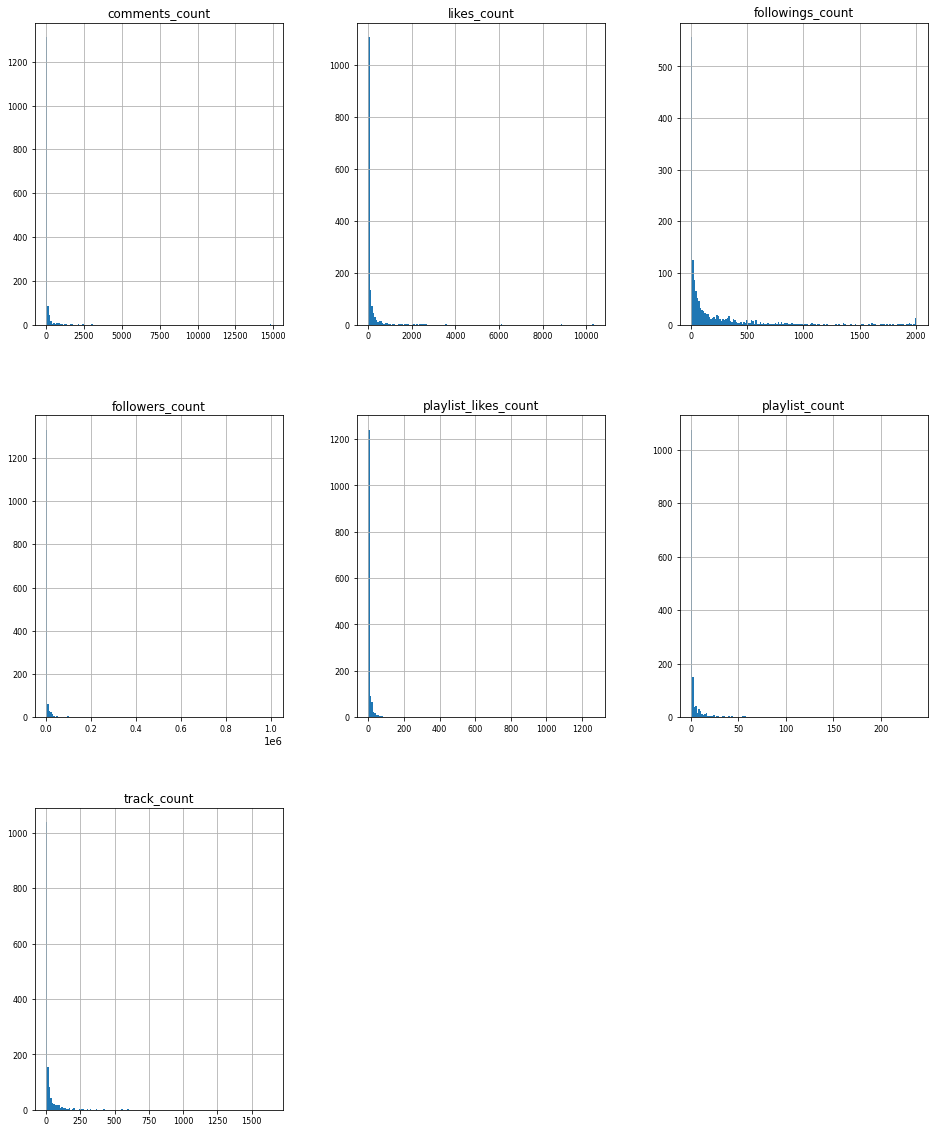

In [34]:
user.hist(figsize=(16, 20), bins=150, xlabelsize=8, ylabelsize=8);

- **Nhận Xét**
  + Số lượng người dùng đa số có số lượng playlist nhỏ hơn 50, có 1 vài người dùng có số lượng playlist lớn hơn 50, ta thấy được đa số người dùng vào để nghe nhạc

Thuộc Tính `comments_count` và `likes_count`

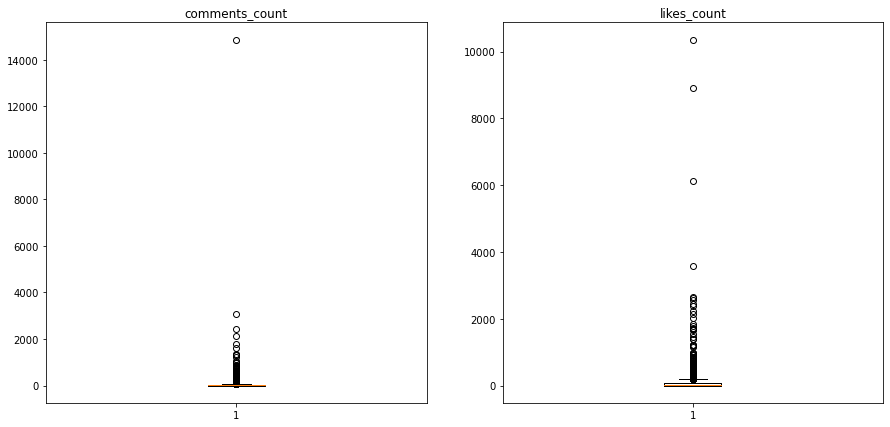

In [52]:
figure, axis = plt.subplots(1, 2, figsize=(15,7))

axis[0].boxplot(data["comments_count"])
axis[0].set_title("comments_count")

axis[1].boxplot(data["likes_count"])
axis[1].set_title("likes_count")

plt.show()

- **Nhận Xét**
  + Ở `comments_count` thì ta thấy hoạt động về bình luận không lớn: đa phần số lần bình luận dưới 2000 lần, tuy nhiên 3 người có số lần bình luận từ 2000 đến 4000, và có 1 người có tới trên 14000 lần bình luận
  + Ở `likes_count` thì ta thấy đa phần lượng yêu thích dưới 3000, có 4 người dùng được số lượng like lớn hơn 3000, có thể 4 người này có sức ảnh hưởng lớn và đưa lên 1 vài ca khúc hay thu hút nhiều người nghe

Dữ liệu rời rạc

Thuộc tính `country_code`

In [65]:
g_data = []
countries = data["country_code"].unique()

for country in countries:
    temp = data.loc[data["country_code"]==country]
    g_data.append(temp.shape[0])

temp_data = {"country": countries, "value": g_data}
t = pd.DataFrame(temp_data)



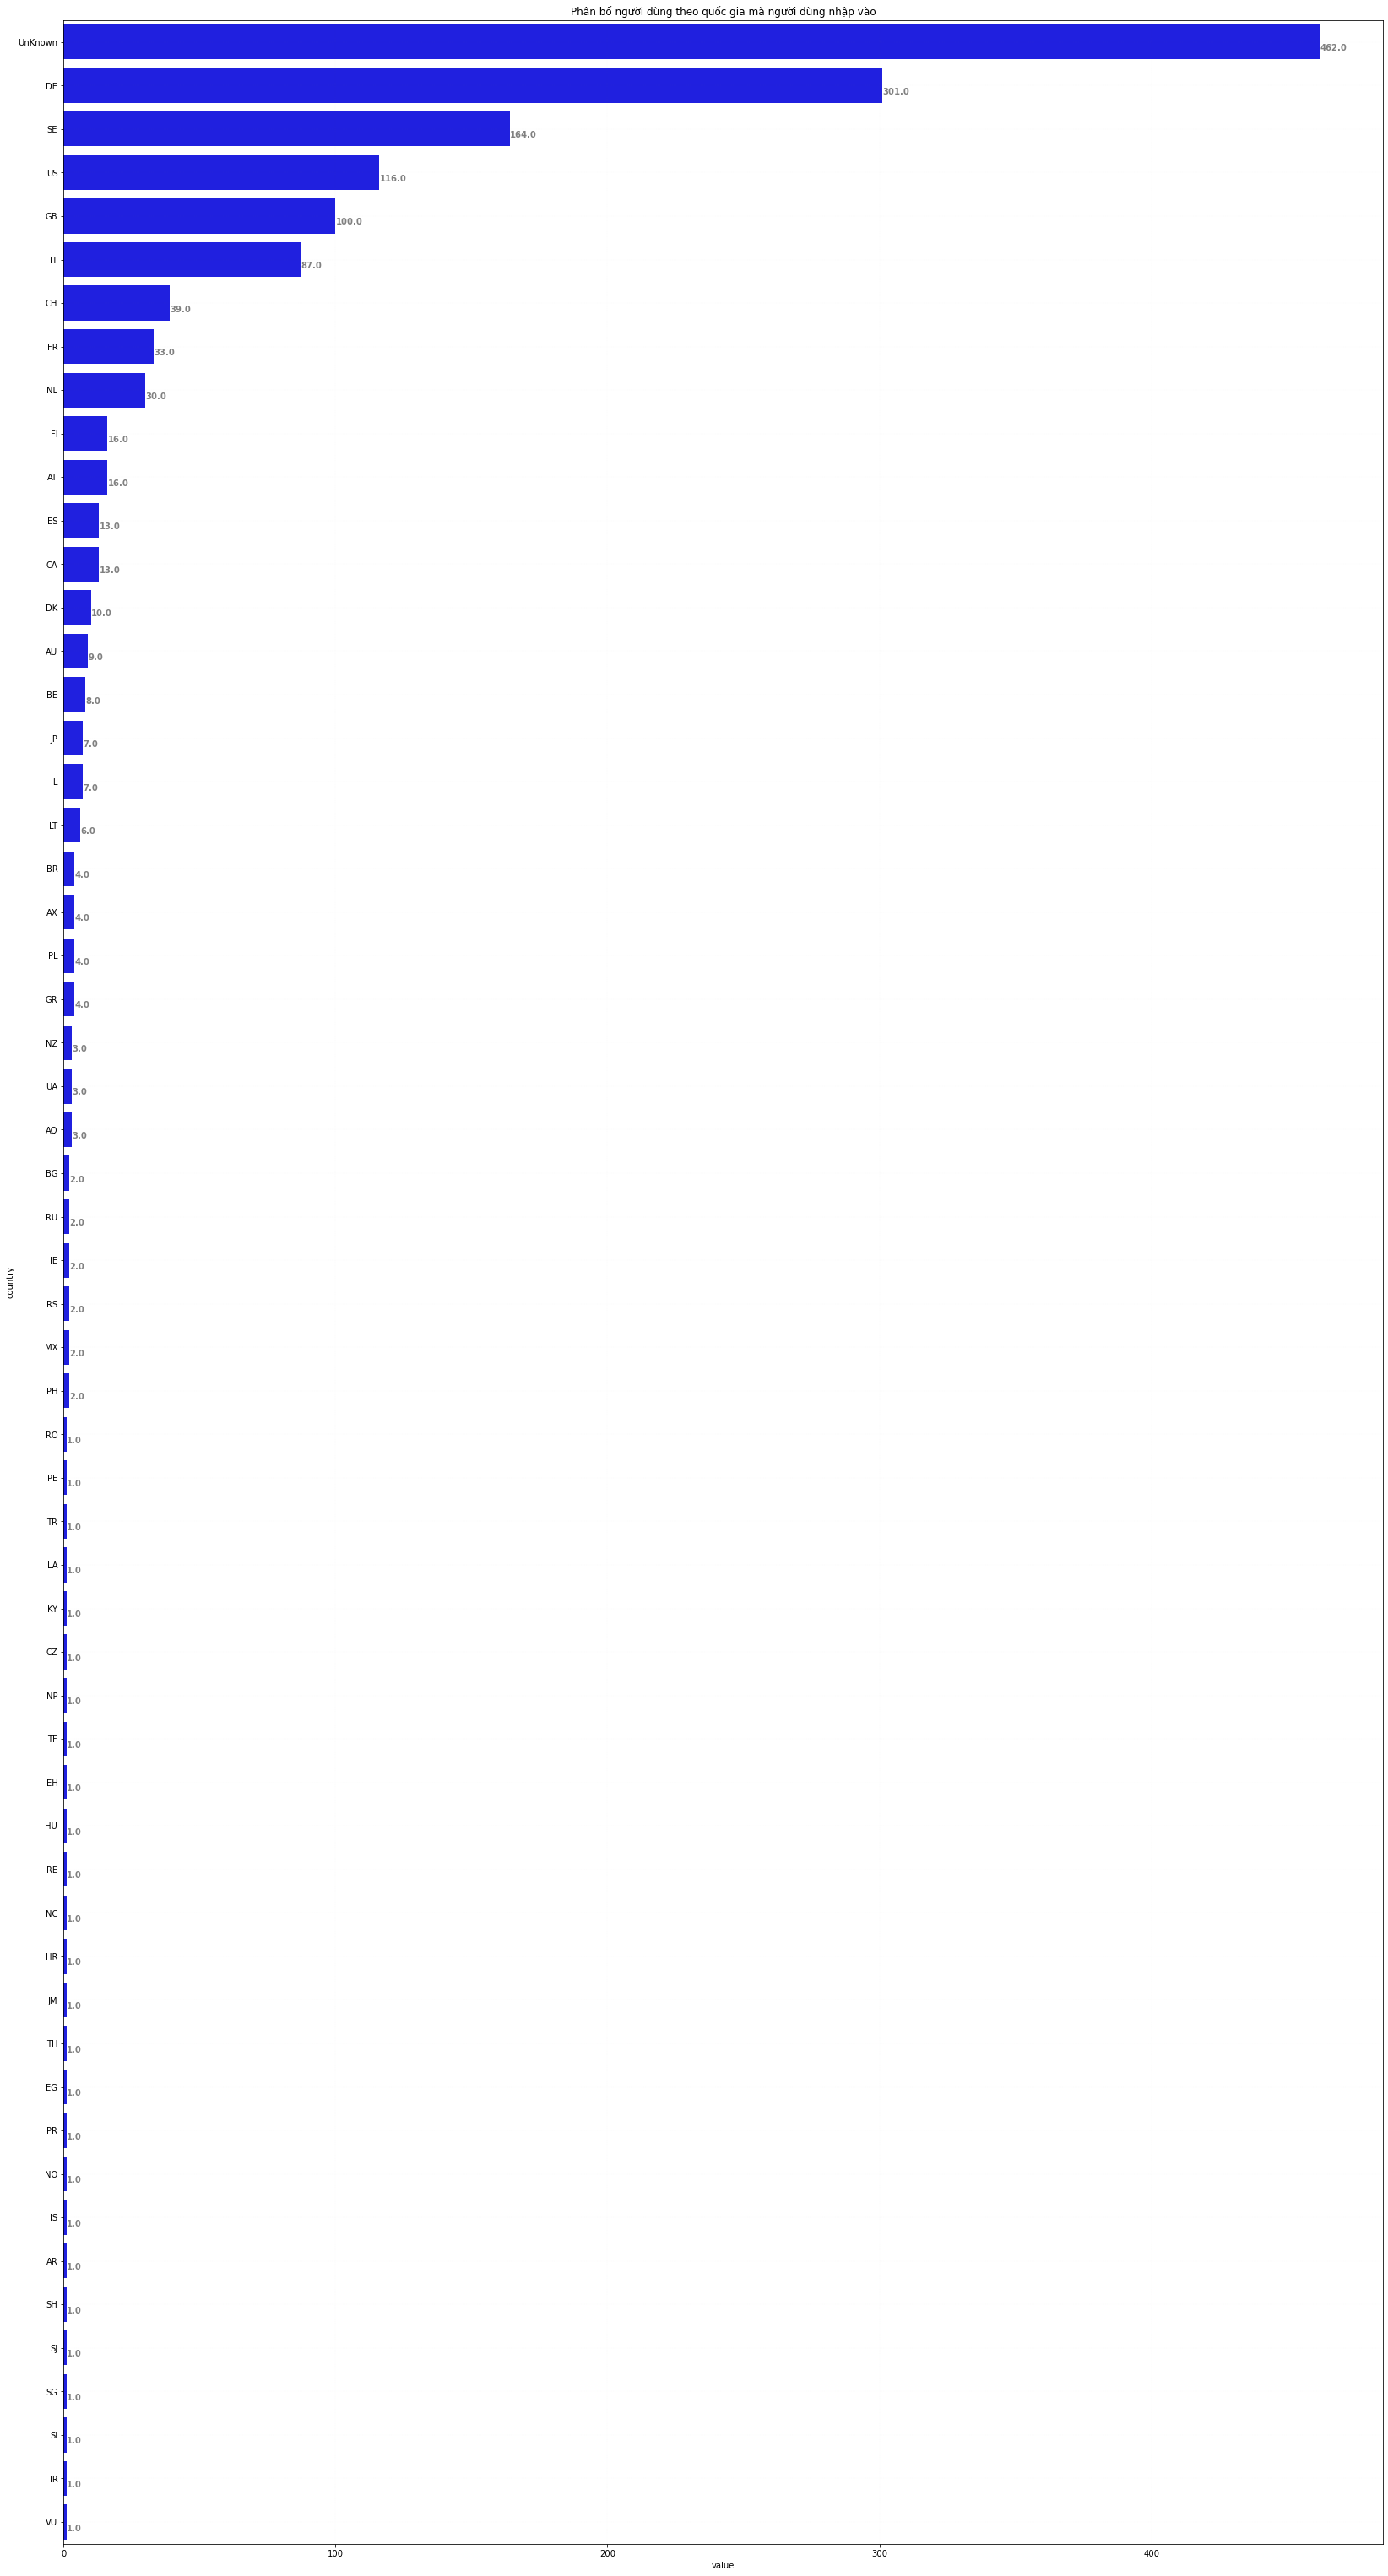

In [73]:
t = t.sort_values(by=['value'], ascending=True)
# Figure Size
fig, ax = plt.subplots(figsize = (28, 55))

temp = []
count = 0
i = 0
while (count < 209):
    i = i + 6
    count = count + 1
    temp.append(i)
    
sns.barplot(x=t["value"], y=t["country"], color='blue')


# # Horizontal Bar Plot
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.2, alpha = 0.1)

ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.2,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

ax.set_title('Phân bố người dùng theo quốc gia mà người dùng nhập vào')

plt.show()

Thuộc tính `pro_unlimited` , `pro`

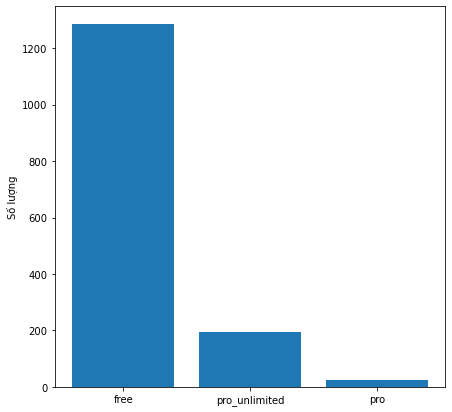

In [83]:
pro_unlimited = data.loc[data["pro_unlimited"]==True].shape[0]
pro = data.loc[data["pro"]==True].shape[0]
free = data.shape[0] - pro - pro_unlimited
t = {"free": free, "pro_unlimited": pro_unlimited, "pro": pro}

plt.figure(figsize=(7, 7))
plt.bar(t.keys(), t.values())
plt.ylabel("Số lượng")
plt.show()

- **Nhận Xét**
  + Số lượng người dùng free chiếm tỉ lệ vượt trội, trong khi đó 2 gói pro chiểm tị lệ nhỏ, điều đó cho thấy Soundcloud cung cấp nhạc chất lượng cao chưa hấp hẫn lắm với người dùng

Thuộc tính `verified`

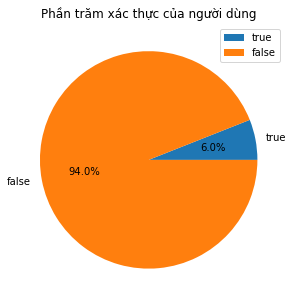

In [96]:
verified_true = round(data.loc[data["verified"]==True].shape[0] / data.shape[0], 2) * 100
verified_false = 100 - verified_true
col = ["true", "false"]
d = [verified_true, verified_false]

plt.figure(figsize=(5, 5))
plt.pie(d, labels=col, autopct='%1.1f%%')
plt.title("Phần trăm xác thực của người dùng")
plt.legend()
plt.show()

Phân tích câu hỏi `Người dùng đăng kí gói nhạc trả phí liệu có đặc điểm chung giữa họ hay không`?

- **Pro**

In [135]:
user_pro = data.loc[data["pro"]==True]
user_pro = user_pro.select_dtypes(include = ['int64'])
user_pro.describe().T

,count,mean,std,min,25%,50%,75%,max
comments_count,23.0,120.086957,205.099956,0.0,13.5,54.0,111.0,787.0
likes_count,23.0,194.391304,209.753695,9.0,30.0,130.0,291.5,725.0
followings_count,23.0,468.695652,547.842167,44.0,86.5,276.0,507.0,1998.0
followers_count,23.0,3143.043478,4196.966388,74.0,738.0,994.0,3777.0,17963.0
playlist_likes_count,23.0,17.695652,25.986771,0.0,3.0,4.0,23.0,109.0
playlist_count,23.0,5.217391,6.259222,0.0,1.0,2.0,7.5,21.0
track_count,23.0,32.521739,30.650329,2.0,10.0,21.0,45.5,107.0


- **Nhận Xét**
   + Dựa vào bảng thống kê trên, ta thấy rõ số lượng trung bình của mỗi thuộc tính đều tăng lên. Do soundclound cung cấp gói pro cho người dùng nghe nhạc nên ta cũng thấy rõ rằng số lượng trung bình `comment` và `following` tăng gấp đôi và gấp 4 lần, hoạt động của người dùng đăng kí gói pro hoạt động mạnh trên `soundclound`

- **Pro_unlimited**

In [136]:
user_pro_unlimited = data.loc[data["pro_unlimited"]==True]
user_pro_unlimited = user_pro_unlimited.select_dtypes(include = ['int64'])
user_pro_unlimited.describe().T

,count,mean,std,min,25%,50%,75%,max
comments_count,193.0,287.497409,1120.115178,0.0,28.0,99.0,227.0,14875.0
likes_count,193.0,331.259067,794.570655,0.0,38.0,115.0,283.0,8894.0
followings_count,193.0,446.005181,500.818356,0.0,79.0,292.0,646.0,2003.0
followers_count,193.0,28284.865285,84839.037874,40.0,1891.0,7777.0,22153.0,1002654.0
playlist_likes_count,193.0,32.865285,98.234215,0.0,2.0,9.0,25.0,1119.0
playlist_count,193.0,17.911917,30.841792,0.0,2.0,7.0,18.0,237.0
track_count,193.0,133.590674,219.887550,0.0,26.0,63.0,129.0,1644.0


- **Nhận Xét**
   + `SoundClound` cung cấp gói pro_unlimited hướng đến các nhà sản xuất nhạc tích cực trên Soundcloud, ta thấy rõ ràng số lượng trung bình về `track` và `playlist` tăng gần như gấp 6 - 7 lần.

**b. Phân tích đa biến**

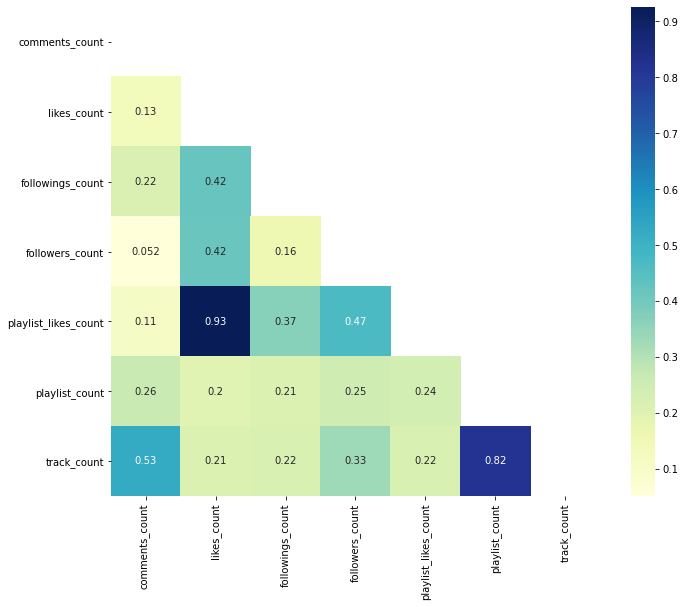

In [117]:
user = data.select_dtypes(include = ['int64'])
d = user.corr(method='pearson')
f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(user.corr()))

sns.heatmap(d, ax=ax, cmap="YlGnBu", annot=True, square=True, mask=mask)
plt.show()

- **Nhận Xét**
  + Có nhiều cặp có hệ số lớn hơn 0.2 -> biểu thị sự đồng biến nhưng yếu và không đáng kể
  + Dựa vào biểu đồ nhiệt, ta thấy có sự liên hệ mối quan hệ rất mạnh mẽ giữa 2 thuộc tính `playlist_likes_count` và `likes_count` với hệ số là 0.93 -> ta sẽ sử dụng biểu đồ phân tán (scatter plot) để biểu diễn rõ cặp thuộc tính này
  + Hệ số giữa `likes_count` và `follower_count` là 0.42 => Gần như không có mối quan hệ giữa 2 thuộc tính đó, nên ta khẳng định rằng `Với các người dùng được nhiều follower, chưa chắc nhận được lượng likes nhiều hơn`

Cặp thuộc tính `playlist_likes_count` và `likes_count`

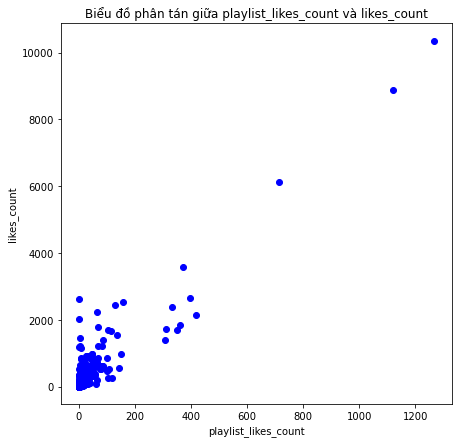

In [121]:
plt.figure(figsize=(7, 7))
plt.scatter(data["playlist_likes_count"], data["likes_count"], c="blue")
plt.title("Biểu đồ phân tán giữa playlist_likes_count và likes_count")
plt.xlabel("playlist_likes_count")
plt.ylabel("likes_count")
plt.show()

- **Nhận Xét**
  + Ta thấy rõ ràng về mối quan hệ đồng biến giữa 2 thuộc tính

Nhóm thuộc tính `followers_count`, `playlists_count` và `tracks_count`
- Ở trên ta có đưa ra dự đoán: `khi 1 người có nhiều playlist và track thì sẽ thu hút nhiều người xem, quá đó số lượng follower của người đó sẽ lớn `.Ta sẽ sử dụng biểu đồ bong bóng (bubble plot) để biếu thị mối liên hệ giữa 3 thuộc tính này

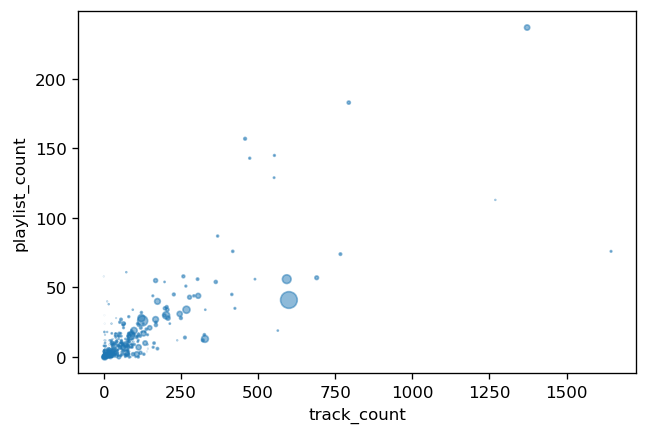

In [131]:
plt.figure(dpi=120)
plt.scatter(data["track_count"], data["playlist_count"], s=data["followers_count"] / 10000, alpha=0.5)
plt.xlabel("track_count")
plt.ylabel("playlist_count")
plt.show()

- **Nhận Xét**
  + Ở biểu đồ trên, ta không thấy mối quan hệ nào đặc biệt giữa 3 thuộc tính trên => dự đoán không đúng, có thể người dùng là người nổi tiếng có thể thu hút nhiều follower hoặc có thể là 1 vài lí do khác